# Задание 2

## Проверим Pandas
Скачать с Kaggle [данные с температурой по городам](https://www.kaggle.com/datasets/sudalairajkumar/daily-temperature-of-major-cities).

Если очень не хочется регистрироваться на сайте, архив *(2data.zip)* можно взять в папке с [заданием](https://disk.yandex.ru/d/MrtwhwSBdLuKKA).

In [1]:
import pandas as pd

Считать данные в `pandas.DataFrame`, посмотреть, что там лежит.

Если хотите вспомнить, как обращаться с DataFrame, могу порекомендовать [мини-курс](https://www.kaggle.com/code/residentmario/creating-reading-and-writing) на том же Kaggle:  там есть примеры всех нужных действий, сгруппированных на 6 страницах (считывание, обращение по индексу, изменение, типы данных).

In [2]:
df = pd.read_csv('city_temperature.csv')

/tmp/ipykernel_101194/3433192447.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('city_temperature.csv')


In [3]:
print(df.head())
print(df.info())

   Region  Country State     City  Month  Day  Year  AvgTemperature
0  Africa  Algeria   NaN  Algiers      1    1  1995            64.2
1  Africa  Algeria   NaN  Algiers      1    2  1995            49.4
2  Africa  Algeria   NaN  Algiers      1    3  1995            48.8
3  Africa  Algeria   NaN  Algiers      1    4  1995            46.4
4  Africa  Algeria   NaN  Algiers      1    5  1995            47.9
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906327 entries, 0 to 2906326
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Region          object 
 1   Country         object 
 2   State           object 
 3   City            object 
 4   Month           int64  
 5   Day             int64  
 6   Year            int64  
 7   AvgTemperature  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 177.4+ MB
None


Сколько записей имеют нулевое значение по полю State?

In [4]:
null_count = df['State'].isna().sum()

print(f"Количество записей с нулевым значением в поле 'State': {null_count}")

Количество записей с нулевым значением в поле 'State': 1450990


Нужно сравнить выполнение операции над числами с плавающей точкой и над целыми числами. Для этого в DateFrame следует создать новый столбец, в который будут записаны значения температуры, умноженные на 10 и приведенные к *int*.

In [5]:
import time

df = pd.read_csv('city_temperature.csv', low_memory=False)

df['Temperature_int'] = (df['AvgTemperature'] * 10).astype(int)

print(df[['AvgTemperature', 'Temperature_int']].head())

print(df.info())

def test_operation(data):
    return data.sum()

start_time = time.time()
float_result = test_operation(df['AvgTemperature'])
float_time = time.time() - start_time

start_time = time.time()
int_result = test_operation(df['Temperature_int'])
int_time = time.time() - start_time

print(f"Время выполнения операции над числами с плавающей точкой: {float_time:.12f} секунд")
print(f"Время выполнения операции над целыми числами: {int_time:.12f} секунд")

   AvgTemperature  Temperature_int
0            64.2              642
1            49.4              494
2            48.8              488
3            46.4              464
4            47.9              479
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906327 entries, 0 to 2906326
Data columns (total 9 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Region           object 
 1   Country          object 
 2   State            object 
 3   City             object 
 4   Month            int64  
 5   Day              int64  
 6   Year             int64  
 7   AvgTemperature   float64
 8   Temperature_int  int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 199.6+ MB
None
Время выполнения операции над числами с плавающей точкой: 0.002546072006 секунд
Время выполнения операции над целыми числами: 0.001116991043 секунд


In [6]:
import datetime

Замерить время исполнения операции с данными (например, подсчета среднего значения `mean()` для столбца).

Предлагаю использовать библиотеку **datetime**, но можете использовать любую другую.


In [7]:
df = pd.read_csv('city_temperature.csv', low_memory=False)

df['Temperature_int'] = (df['AvgTemperature'] * 10).astype(int)

print(df[['AvgTemperature', 'Temperature_int']].head())

print(df.info())

def test_operation(data):
    return data.mean()

start_time = time.time()
float_result = test_operation(df['AvgTemperature'])
float_time = time.time() - start_time

start_time = time.time()
int_result = test_operation(df['Temperature_int'])
int_time = time.time() - start_time

print(f"Время выполнения операции над числами с плавающей точкой: {float_time:.12f} секунд")
print(f"Время выполнения операции над целыми числами: {int_time:.12f} секунд")

   AvgTemperature  Temperature_int
0            64.2              642
1            49.4              494
2            48.8              488
3            46.4              464
4            47.9              479
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906327 entries, 0 to 2906326
Data columns (total 9 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Region           object 
 1   Country          object 
 2   State            object 
 3   City             object 
 4   Month            int64  
 5   Day              int64  
 6   Year             int64  
 7   AvgTemperature   float64
 8   Temperature_int  int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 199.6+ MB
None
Время выполнения операции над числами с плавающей точкой: 0.003834009171 секунд
Время выполнения операции над целыми числами: 0.001782417297 секунд


## Проверка через numpy
Проверим то же самое для numpy массива. Для этого колонку `pd.Series` нужно привести к numpy массиву, явно указав тип данных. Для исходной температуры будет float64, для целочисленной - int16.

In [8]:
import numpy as np
import timeit

In [9]:
df = pd.read_csv('city_temperature.csv', low_memory=False)

# Преобразование столбцов в numpy массивы с нужными типами данных
temp_float64 = df['AvgTemperature'].to_numpy(dtype=np.float64)
temp_int16 = (df['AvgTemperature'] * 10).astype(np.int16).to_numpy()

def test_operation_float64():
    return np.sum(temp_float64)

def test_operation_int16():
    return np.sum(temp_int16)

number_of_repeats = 100

float_time = timeit.timeit(test_operation_float64, number=number_of_repeats)
int_time = timeit.timeit(test_operation_int16, number=number_of_repeats)

print(f"Среднее время выполнения операции над массивом с типом float64: {float_time / number_of_repeats:.10f} секунд")
print(f"Среднее время выполнения операции над массивом с типом int16: {int_time / number_of_repeats:.10f} секунд")

Среднее время выполнения операции над массивом с типом float64: 0.0010671216 секунд
Среднее время выполнения операции над массивом с типом int16: 0.0008129891 секунд


Замерить время выполнения той же операции `mean()`.

In [10]:
import pandas as pd # type: ignore
import numpy as np # type: ignore
import timeit

df = pd.read_csv('city_temperature.csv', low_memory=False)

temp_float64 = df['AvgTemperature'].to_numpy(dtype=np.float64)
temp_int16 = (df['AvgTemperature'] * 10).astype(np.int16).to_numpy()

def test_operation_float64():
    return np.mean(temp_float64)

def test_operation_int16():
    return np.mean(temp_int16)

number_of_repeats = 100

float_time = timeit.timeit(test_operation_float64, number=number_of_repeats)
int_time = timeit.timeit(test_operation_int16, number=number_of_repeats)

print(f"Среднее время выполнения операции над массивом с типом float64: {float_time / number_of_repeats:.10f} секунд")
print(f"Среднее время выполнения операции над массивом с типом int16: {int_time / number_of_repeats:.10f} секунд")

Среднее время выполнения операции над массивом с типом float64: 0.0010105548 секунд
Среднее время выполнения операции над массивом с типом int16: 0.0008858252 секунд


# Задание 4

In [11]:
from PIL import Image

Загружаем изображение

In [12]:
im = Image.open('pic/pic.jpg')

In [13]:
im.size

(1147, 642)

In [14]:
import matplotlib.pyplot as plt

Посмотрим, что загрузилось

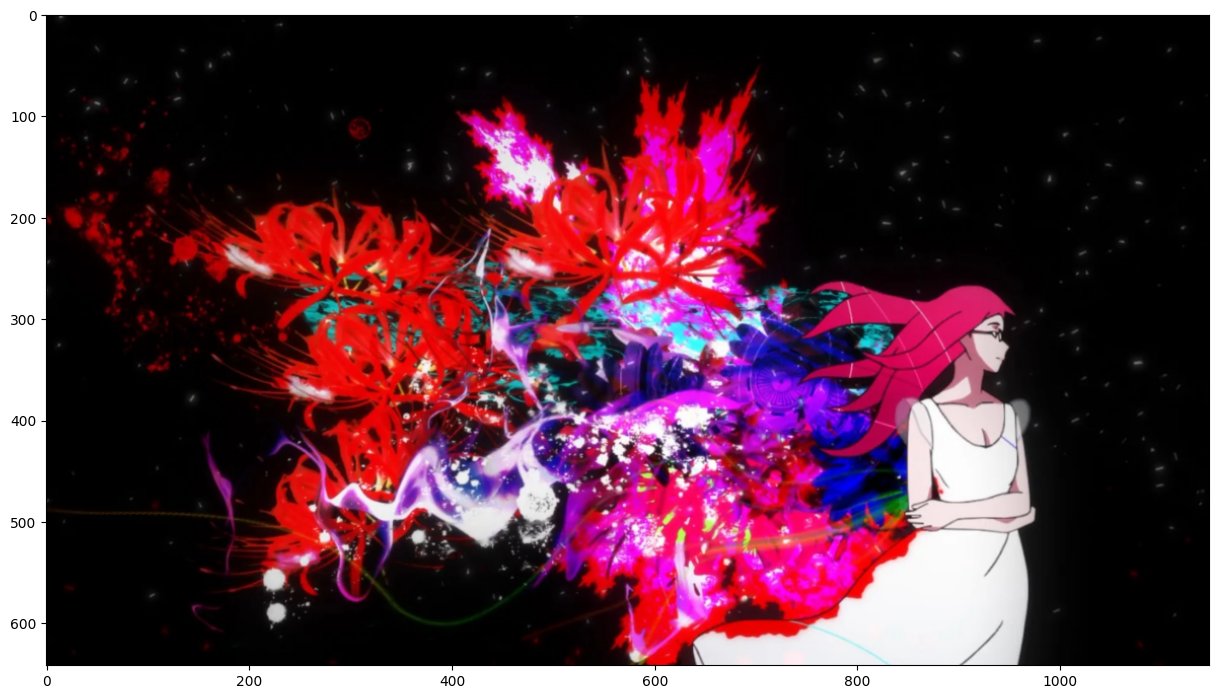

In [15]:
plt.figure(figsize=(15.,10.))
plt.imshow(im)

Переводим в трехмерный numpy массив (x, y, цвет).

In [16]:
a = np.asarray(im)
a[500:505, 495:500]

array([[[151, 146, 150, 255],
        [103,  98, 102, 255],
        [ 63,  58,  64, 255],
        [ 48,  42,  48, 255],
        [ 35,  28,  36, 255]],

       [[169, 164, 168, 255],
        [117, 112, 116, 255],
        [ 90,  83,  90, 255],
        [ 73,  66,  73, 255],
        [ 43,  34,  42, 255]],

       [[144, 139, 143, 255],
        [115, 110, 114, 255],
        [103,  97, 101, 255],
        [ 82,  76,  82, 255],
        [ 52,  43,  51, 255]],

       [[ 97,  92,  96, 255],
        [ 87,  82,  86, 255],
        [ 78,  72,  76, 255],
        [ 72,  66,  71, 255],
        [ 80,  71,  78, 255]],

       [[124, 120, 123, 255],
        [124, 119, 123, 255],
        [113, 109, 114, 255],
        [105,  99, 106, 255],
        [136, 127, 135, 255]]], dtype=uint8)

Найдем фрагменты изображения, с нужным нам наличием/отсутствием цвета.

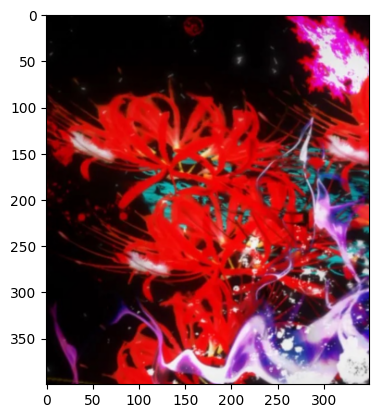

In [17]:
plt.imshow(a[100:500, 150:500])

**Красное:**

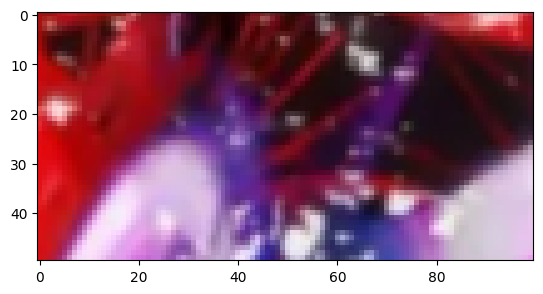

In [18]:
plt.imshow(a[400:450, 350:450])

**Не красное:**

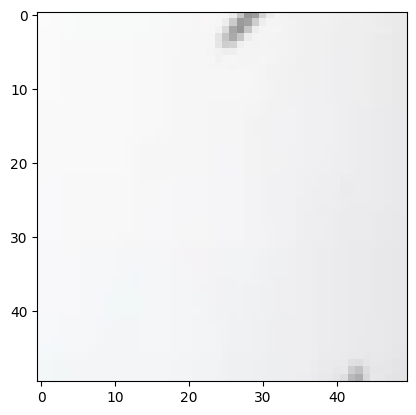

In [19]:
plt.imshow(a[550:600, 900:950])

Подготовка набора данных для обучения.

Желательно, чередовать положительные и отрицательные примеры, при добавлении их в общий массив:

~~y = [0,0,0,1,1,1]~~

`y  = [0,1,0,1,0,1]`.

Должно получиться следующее (*для нейронки с 3-мя входами и одним выходом*):

|x_R|x_G|x_B|y_Target|
|---|---|---|---|
|255|255|0|1|
|0|0|255|0|



          R  G  B  our color
0       202  0  2          1
1       202  0  1          1
2       201  0  3          1
3       203  0  1          1
4       204  0  1          1
...     ... .. ..        ...
736369    0  0  0          0
736370    0  0  0          0
736371    0  0  0          0
736372    0  0  0          0
736373    0  0  0          0

[736374 rows x 4 columns]
          R    G    B  our color
0        61   43   37          0
1         0    0    0          0
2       188   46   88          0
3         0    0    0          0
4         0    0    0          0
...     ...  ...  ...        ...
736369    0    0    0          0
736370  170   18   82          0
736371    1    1    1          0
736372  224   18  217          0
736373  195  238  247          0

[736374 rows x 4 columns]
Positives: True
Negatives: True


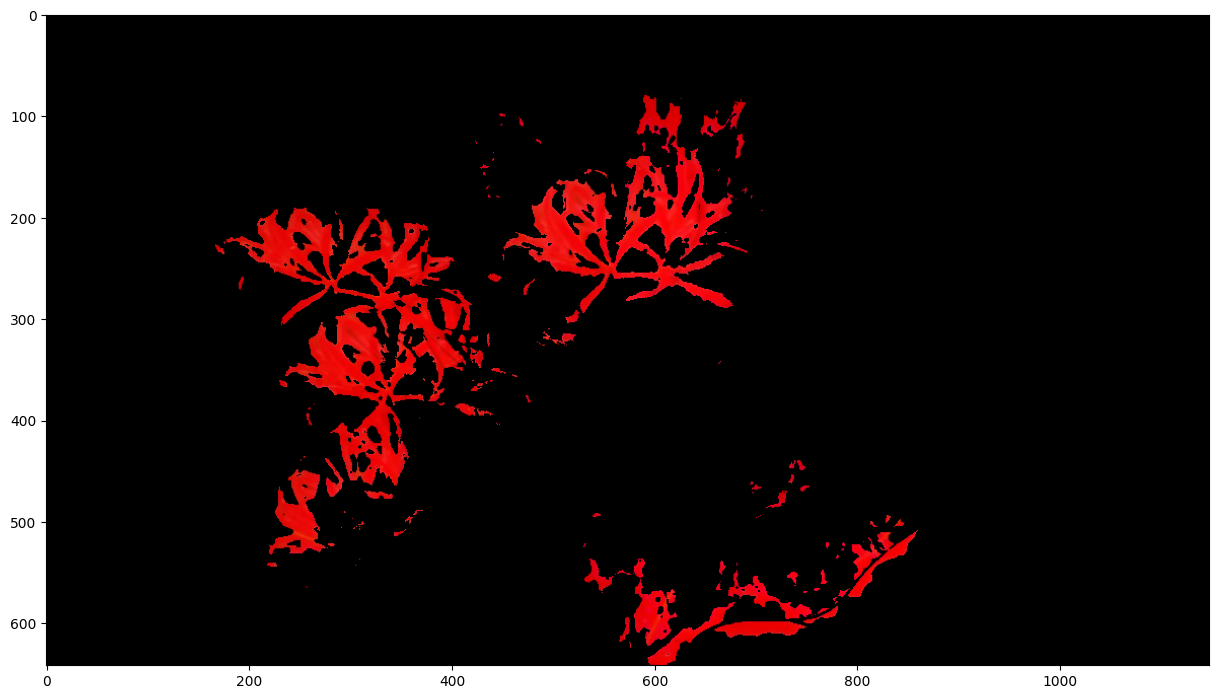

In [20]:
pixel_colors = np.array(im)

# Если изображение в формате RGBA, то берем только RGB
if pixel_colors.shape[2] == 4:
    pixel_colors = pixel_colors[:, :, :3]

target_color = np.array([255, 0, 0])

# def is_target_color(color):
#     return np.all(np.abs(color - target_color) < 50)
def is_target_color(color):
    return (
        color[0] > 200 and  # Красный сильно выражен
        color[1] < 50 and   # Зелёный почти отсутствует
        color[2] < 50       # Синий почти отсутствует
    )


mask_target_color = np.array([[is_target_color(color) for color in row] for row in pixel_colors])
pixels_with_target_color = pixel_colors[mask_target_color]
pixels_without_target_color = pixel_colors[~mask_target_color]

# Создаем копию изображения. Отмечаем пиксели, соответствующие целевому цвету, остальные делаем черными
output_image = np.zeros_like(pixel_colors)
output_image[mask_target_color] = pixel_colors[mask_target_color]
output_image = Image.fromarray(output_image.astype('uint8'))
output_image.save('pic/output_image.jpg')

# Создание датасета для обучения
df_with_target_color = pd.DataFrame(pixels_with_target_color.reshape(-1, 3), columns=['R', 'G', 'B'])
df_with_target_color['our color'] = 1

df_without_target_color = pd.DataFrame(pixels_without_target_color.reshape(-1, 3), columns=['R', 'G', 'B'])
df_without_target_color['our color'] = 0

training_data = pd.concat([df_with_target_color, df_without_target_color], ignore_index=True)

# Перетасовка датасета
shuffled_training_data = training_data.sample(frac=1).reset_index(drop=True)

print(training_data)
print(shuffled_training_data)

positive = np.any(shuffled_training_data['our color'] == 1)
negative = np.any(shuffled_training_data['our color'] == 0)

print("Positives:", positive)
print("Negatives:", negative)

plt.figure(figsize=(15.,10.))
plt.imshow(output_image)

Делим данные на обучающую и тестовую выборки вручную **(без использования библиотеки sklearn)**.

Самый простой вариант: каждый **n**-й набор уходит в тестовую выборку.

Проверить, что и в обучающей и в тестовой выборке есть как положительные, так и отрицательные примеры.

In [21]:
n = 10  # каждый n-й элемент будет в тестовой выборке

# Создание индексов
indices = np.arange(len(shuffled_training_data))

# Разделение индексов
test_indices = indices[::n]  # выбираем каждый n-й индекс
train_indices = np.delete(indices, test_indices)  # остальные индексы для обучающей выборки

train_data = shuffled_training_data.iloc[train_indices]
test_data = shuffled_training_data.iloc[test_indices]

train_positive = np.any(train_data['our color'] == 1)
train_negative = np.any(train_data['our color'] == 0)
test_positive = np.any(test_data['our color'] == 1)
test_negative = np.any(test_data['our color'] == 0)

print("Train data:\n", train_data)
print("Test data:\n", test_data)

print("Train has positives:", train_positive)
print("Train has negatives:", train_negative)
print("Test has positives:", test_positive)
print("Test has negatives:", test_negative)


Train data:
           R    G    B  our color
1         0    0    0          0
2       188   46   88          0
3         0    0    0          0
4         0    0    0          0
5       215    5   85          0
...     ...  ...  ...        ...
736368   15    5    4          0
736369    0    0    0          0
736371    1    1    1          0
736372  224   18  217          0
736373  195  238  247          0

[662736 rows x 4 columns]
Test data:
           R   G   B  our color
0        61  43  37          0
10        3   0   1          0
20        2   0   1          0
30      231  17  17          1
40      147  15  17          0
...     ...  ..  ..        ...
736330    0   0   0          0
736340  239   9   5          1
736350  194  17  21          0
736360    1   1   1          0
736370  170  18  82          0

[73638 rows x 4 columns]
Train has positives: True
Train has negatives: True
Test has positives: True
Test has negatives: True


Обучение, оценка результатов, вывод весовых коэффициентов

*Это происходит в лабе по другому предмету; когда будет готово, можно будет импортировать код библиотекой, подрубить класс нейронки и проверить, как она работает* :)

# Собственное решение

#### Нормализация данных

In [22]:
print(shuffled_training_data)

          R    G    B  our color
0        61   43   37          0
1         0    0    0          0
2       188   46   88          0
3         0    0    0          0
4         0    0    0          0
...     ...  ...  ...        ...
736369    0    0    0          0
736370  170   18   82          0
736371    1    1    1          0
736372  224   18  217          0
736373  195  238  247          0

[736374 rows x 4 columns]


In [23]:
X = np.array(shuffled_training_data[['R', 'G', 'B']]) / 255.0
y = np.array(shuffled_training_data['our color'])

In [24]:
print(X,y)

[[0.23921569 0.16862745 0.14509804]
 [0.         0.         0.        ]
 [0.7372549  0.18039216 0.34509804]
 ...
 [0.00392157 0.00392157 0.00392157]
 [0.87843137 0.07058824 0.85098039]
 [0.76470588 0.93333333 0.96862745]] [0 0 0 ... 0 0 0]


Проверка баланса классов

In [25]:
print("Class balance:", np.bincount(y))

Class balance: [691148  45226]


In [28]:
from src.neural_network import *

# Формируем тренировочные и тестовые данные
train_data_normalized = list(zip(X[train_indices], y[train_indices]))
test_data_normalized = list(zip(X[test_indices], y[test_indices]))

# Обучение нейронной сети
neural_net = NeuralNetwork(num_neurons=1, num_inputs_per_neuron=3)
print("Initial Weights:", neural_net.neurons[0].get_weights()[0])
print("Initial Bias:", neural_net.neurons[0].get_weights()[1])

neural_net.evaluate(test_data_normalized)
neural_net.evaluate(train_data_normalized)

neural_net.train(train_data_normalized, learning_rate=0.0001, epochs=10, batch_size=1024)

print("Trained Weights:", neural_net.neurons[0].get_weights()[0])
print("Trained Bias:", neural_net.neurons[0].get_weights()[1])
neural_net.evaluate(test_data_normalized)
neural_net.evaluate(train_data_normalized)


Initial Weights: [0.00764075 0.00571438 0.00441885]
Initial Bias: 0.009682914535340358
Mean Squared Error: 0.029595318933632816
Mean Squared Error: 0.02977589234833278
Trained Weights: [ 0.64356246  0.00921026 -0.65011682]
Trained Bias: -0.006241420046198369
Mean Squared Error: 0.01417569175187122
Mean Squared Error: 0.01432410820697018


np.float64(0.01432410820697018)

#### Воссоздание RGB-изображения из предсказаний нейронной сети

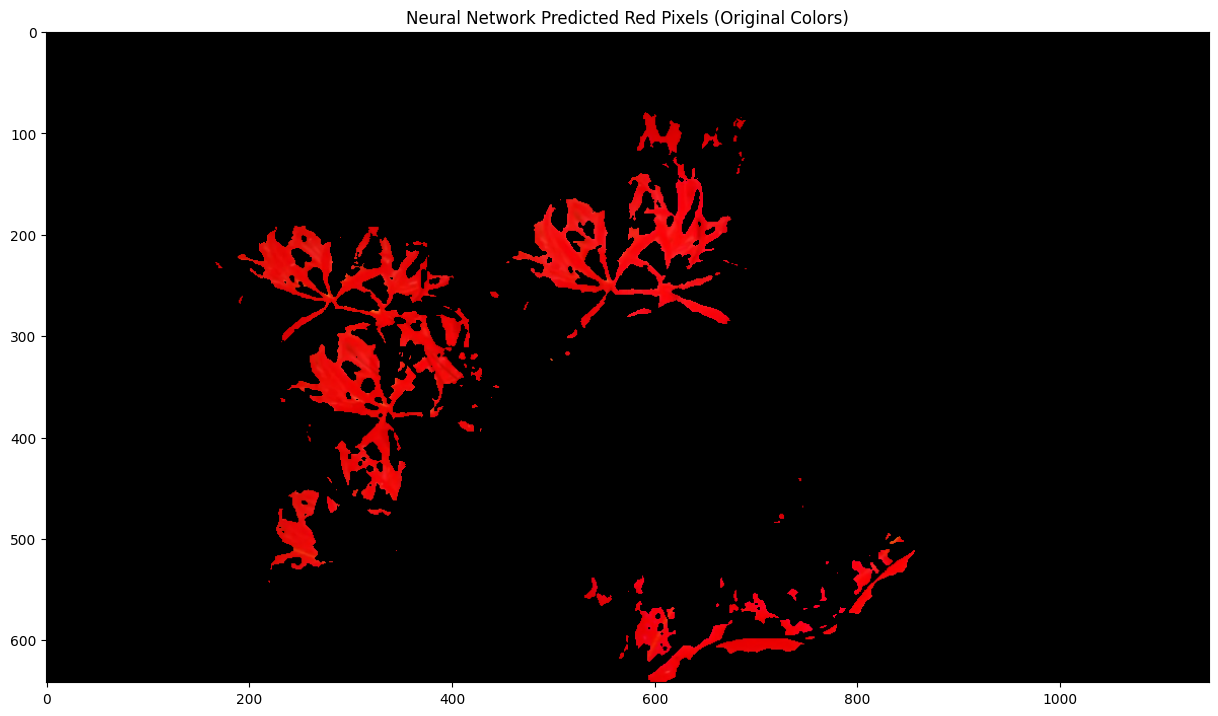

Red pixels: 36517
Non-red pixels: 699857


In [29]:
pixel_colors_normalized = pixel_colors / 255.0
height, width, _ = pixel_colors.shape
pixels_flat = pixel_colors_normalized.reshape(-1, 3)

predictions = neural_net.predict_batch(pixels_flat)[:, 0]
pred_classes = (predictions > 0.5).astype(np.uint8) 

# Создаём RGB-изображение: красные пиксели берём из исходного, остальные чёрные
output_array = np.zeros_like(pixel_colors)
mask = pred_classes.reshape(height, width)
output_array[mask == 1] = pixel_colors[mask == 1]  # Копируем RGB для предсказанных красных

# Преобразуем в изображение
output_image_pred = Image.fromarray(output_array.astype('uint8'))
plt.figure(figsize=(15, 10))
plt.imshow(output_image_pred)
plt.title("Neural Network Predicted Red Pixels (Original Colors)")
plt.show()

red_count = np.sum(pred_classes)
non_red_count = len(pred_classes) - red_count
print(f"Red pixels: {red_count}")
print(f"Non-red pixels: {non_red_count}")

output_image_pred.save('pic/predicted_rgb_neural_net.jpg')

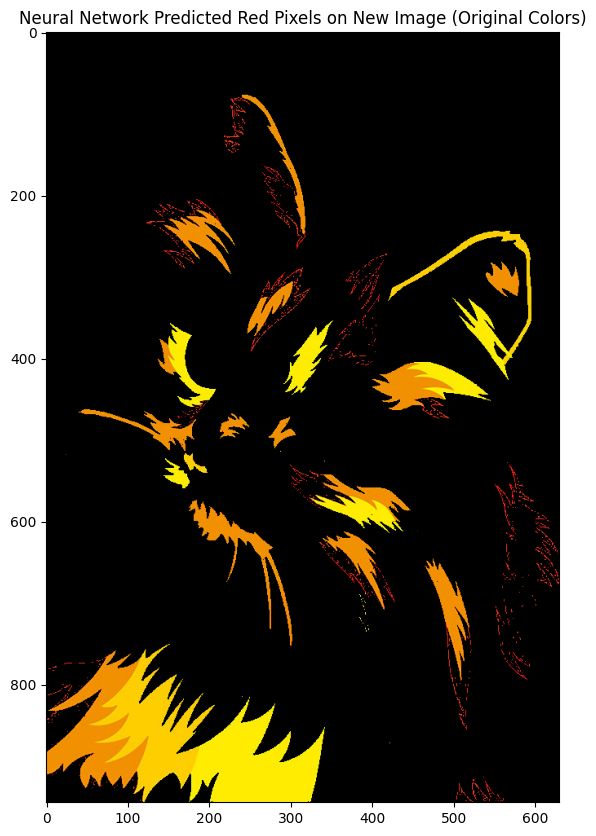

New Image Red pixels: 65906
New Image Non-red pixels: 529444


In [30]:
# Проверка нейронной сети на новом изображении
new_image = Image.open('kotik/kotik.jpg')  # Укажите имя нового изображения
new_pixel_colors = np.array(new_image)

# Если изображение в формате RGBA, берём только RGB
if new_pixel_colors.shape[2] == 4:
    new_pixel_colors = new_pixel_colors[:, :, :3]

# Нормализация и предсказание
new_pixel_colors_normalized = new_pixel_colors / 255.0
new_height, new_width, _ = new_pixel_colors.shape
new_pixels_flat = new_pixel_colors_normalized.reshape(-1, 3)

# Векторизованное предсказание
new_predictions = neural_net.predict_batch(new_pixels_flat)[:, 0]  # (N,), берём первый нейрон
new_pred_classes = (new_predictions > 0.5).astype(np.uint8)  # Порог 0.5, (N,)

# Создаём RGB-изображение: красные пиксели берём из исходного, остальные чёрные
new_output_array = np.zeros_like(new_pixel_colors)  # (new_height, new_width, 3)
new_mask = new_pred_classes.reshape(new_height, new_width)  # (new_height, new_width)
new_output_array[new_mask == 1] = new_pixel_colors[new_mask == 1]  # Копируем RGB для предсказанных красных

# Преобразуем в изображение
new_output_image_pred = Image.fromarray(new_output_array.astype('uint8'))
plt.figure(figsize=(15, 10))
plt.imshow(new_output_image_pred)
plt.title("Neural Network Predicted Red Pixels on New Image (Original Colors)")
plt.show()

new_red_count = np.sum(new_pred_classes)
new_non_red_count = len(new_pred_classes) - new_red_count
print(f"New Image Red pixels: {new_red_count}")
print(f"New Image Non-red pixels: {new_non_red_count}")

new_output_image_pred.save('kotik/predicted_rgb_neural_net_new.jpg')

#### SKlearn 

LogisticRegression Train Accuracy: 98.45%
LogisticRegression Test Accuracy: 98.46%


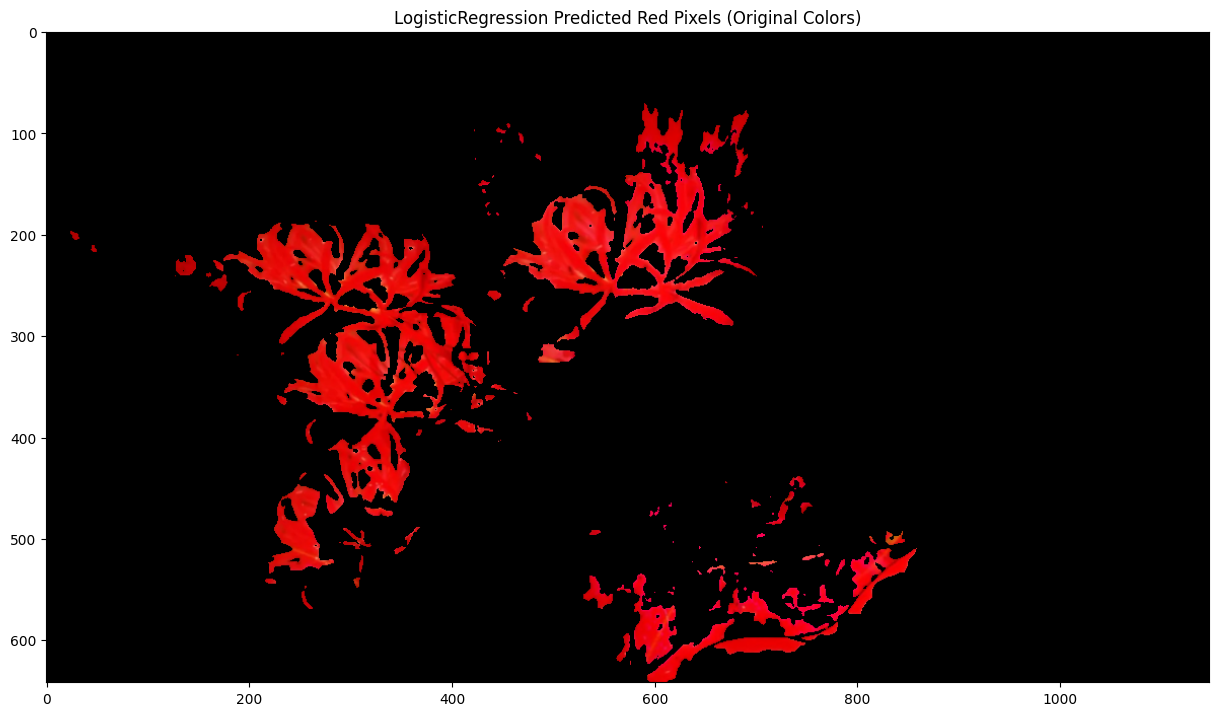

LogisticRegression Red pixels: 56163
LogisticRegression Non-red pixels: 680211


In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Обучение LogisticRegression
log_reg = LogisticRegression(class_weight='balanced', random_state=42)
log_reg.fit(X[train_indices], y[train_indices])

# Оценка точности
train_accuracy = accuracy_score(y[train_indices], log_reg.predict(X[train_indices]))
test_accuracy = accuracy_score(y[test_indices], log_reg.predict(X[test_indices]))
print(f"LogisticRegression Train Accuracy: {train_accuracy * 100:.2f}%")
print(f"LogisticRegression Test Accuracy: {test_accuracy * 100:.2f}%")

# Векторизованная визуализация предсказанной маски
predictions = log_reg.predict(pixels_flat)  # (N,)
pred_classes = predictions.astype(np.uint8)  # Уже 0 или 1

output_array = np.zeros_like(pixel_colors)  # (height, width, 3)
mask = pred_classes.reshape(height, width)  # (height, width)
output_array[mask == 1] = pixel_colors[mask == 1]  # Копируем RGB для предсказанных красных

output_image_log_reg = Image.fromarray(output_array.astype('uint8'))
plt.figure(figsize=(15, 10))
plt.imshow(output_image_log_reg)
plt.title("LogisticRegression Predicted Red Pixels (Original Colors)")
plt.show()

red_count = np.sum(pred_classes)
non_red_count = len(pred_classes) - red_count
print(f"LogisticRegression Red pixels: {red_count}")
print(f"LogisticRegression Non-red pixels: {non_red_count}")

output_image_log_reg.save('kotik/predicted_rgb_logistic_regression.jpg')

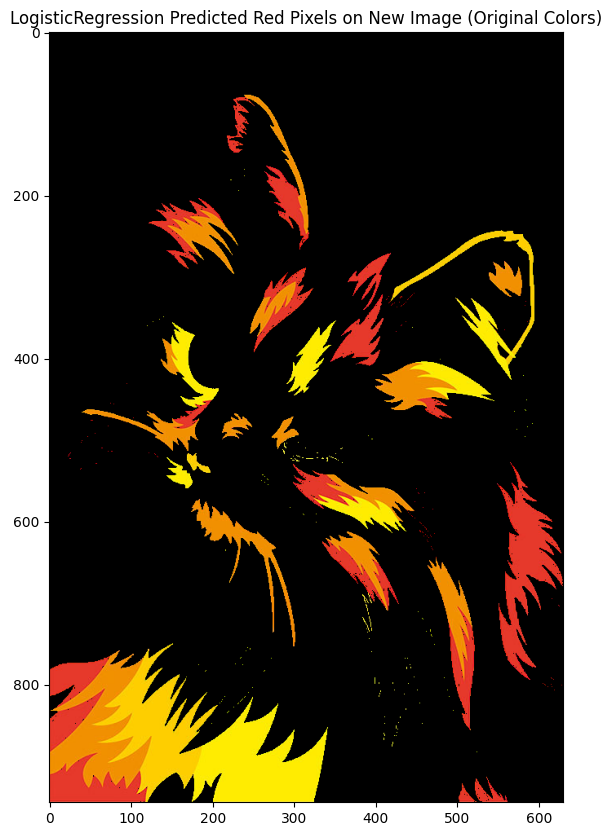

LogisticRegression New Image Red pixels: 95346
LogisticRegression New Image Non-red pixels: 500004


In [32]:
# Проверка LogisticRegression на новом изображении
new_image = Image.open('kotik/kotik.jpg')  # Укажите имя нового изображения
new_pixel_colors = np.array(new_image)

# Если изображение в формате RGBA, берём только RGB
if new_pixel_colors.shape[2] == 4:
    new_pixel_colors = new_pixel_colors[:, :, :3]

# Нормализация и предсказание
new_pixel_colors_normalized = new_pixel_colors / 255.0
new_height, new_width, _ = new_pixel_colors.shape
new_pixels_flat = new_pixel_colors_normalized.reshape(-1, 3)

# Предсказание
new_predictions = log_reg.predict(new_pixels_flat)  # (N,), 0 или 1
new_pred_classes = new_predictions.astype(np.uint8)  # Уже 0 или 1, (N,)

# Создаём RGB-изображение: красные пиксели берём из исходного, остальные чёрные
new_output_array = np.zeros_like(new_pixel_colors)  # (new_height, new_width, 3)
new_mask = new_pred_classes.reshape(new_height, new_width)  # (new_height, new_width)
new_output_array[new_mask == 1] = new_pixel_colors[new_mask == 1]  # Копируем RGB для предсказанных красных

# Преобразуем в изображение
new_output_image_log_reg = Image.fromarray(new_output_array.astype('uint8'))
plt.figure(figsize=(15, 10))
plt.imshow(new_output_image_log_reg)
plt.title("LogisticRegression Predicted Red Pixels on New Image (Original Colors)")
plt.show()

new_red_count = np.sum(new_pred_classes)
new_non_red_count = len(new_pred_classes) - new_red_count
print(f"LogisticRegression New Image Red pixels: {new_red_count}")
print(f"LogisticRegression New Image Non-red pixels: {new_non_red_count}")

new_output_image_log_reg.save('kotik/predicted_rgb_logistic_regression_new.jpg')

In [ ]:
print(new_output_array)
# Преобразуем в 2D: каждый пиксель как строка из 3 чисел
pixels = new_output_array.reshape(-1, 3)

# Удаляем чёрные пиксели
non_black_pixels = pixels[~np.all(pixels == [0, 0, 0], axis=1)]

# Получаем уникальные цвета
unique_colors = np.unique(non_black_pixels, axis=0)

print("Уникальные цвета без чёрного:")
print(unique_colors)

Проверка работы `Image.fromarray()` для вывода результатов обучения

In [ ]:
# # Одномерный массив для mode="L" (оттенки серого)
# var_1 = np.array([[255, 0, 255, 255, 255],
#                   [100, 0, 100, 100, 100],
#                   [0, 0, 0, 0, 0],
#                   [100, 0, 100, 100, 100],
#                   [0, 0, 0, 0, 0]], dtype='uint8')

# # Трёхмерный массив для mode="RGB"
# var_2 = np.array([[[255, 255, 255], [0, 0, 0], [255, 0, 0], [0, 255, 0], [0, 0, 255]],
#                   [[100, 0, 0], [0, 0, 0], [100, 0, 0], [100, 0, 0], [100, 0, 0]],
#                   [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]],
#                   [[100, 0, 0], [0, 0, 0], [100, 0, 0], [100, 0, 0], [100, 0, 0]],
#                   [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]]], dtype='uint8')

# print(var_1.shape)  # (5, 5)
# print(var_2.shape)  # (5, 5, 3)

# # Вывод в оттенках серого
# plt.figure(figsize=(5, 5))
# plt.imshow(Image.fromarray(var_1, mode="L"), cmap='gray')
# plt.title("Grayscale Image")
# plt.show()

# # Вывод в RGB
# plt.figure(figsize=(5, 5))
# plt.imshow(Image.fromarray(var_2, mode="RGB"))
# plt.title("RGB Image")
# plt.show()

# Работает с моделью машинного обучения:

> Тут была магия, которую вам надо реализовать.

In [ ]:
# from sklearn.linear_model import LogisticRegression

# model = LogisticRegression().fit(x_train, y_train)
# model.score(x_test, y_test)


Подготовка данных (всего изображения) для передачи в нейронку.

Обработка данных нейронной сетью.

In [ ]:
# res = []
# for i in range(len(mas)):
#     res.append(100 * model.predict(mas[i]))

# our_array = np.array(res, dtype='uint8').reshape(1080, 1920)

# res.count([100]), res.count([0])

# plt.figure(figsize=(15.,10.))
# plt.imshow(Image.fromarray(our_array, mode="L"))

Преобразование полученного от нейронки списка в массив для вывода на экран.

In [ ]:
# our_array = np.array(res, dtype='uint8').reshape(1080,1920)

Проверка количества пикселей, распознанных как красные.

In [ ]:
# res.count([100]), res.count([0])

На мой взгляд, топ:

In [ ]:
# plt.figure(figsize=(15.,10.))
# plt.imshow(Image.fromarray(our_array, mode="L"))